In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('/kaggle/input/income-adult/adult_data.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Taking 1000 samples only

In [4]:
drop_cols = data.iloc[ : , 3: ]
data = data.drop(drop_cols, axis = 1)
data.columns = ['Age', 'WorkClass', 'Salary']
data = data.sample(1000, random_state = 1).reset_index(drop = True)
data

,Age,WorkClass,Salary
0,62,Self-emp-not-inc,26911
1,18,Private,208103
2,25,Private,102476
3,33,Private,511517
4,36,Private,292570
...,...,...,...
995,63,?,170529
996,23,Private,213719
997,25,Private,190107
998,26,Private,97153


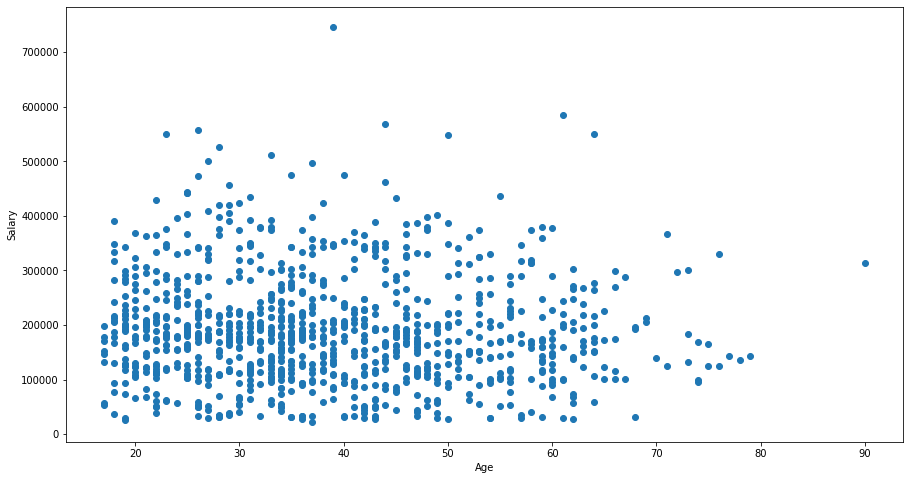

In [5]:
plt.figure(figsize = (15,8))
plt.scatter(data.Age, data.Salary)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

# KMeans model with default parameters

In [6]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
y_pred = km.fit_predict(data[['Age', 'Salary']])
y_pred

array([0, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 1,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 2, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2,
       2, 0, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2,
       2, 0, 0, 2, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 1,
       2, 2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 2, 0, 0,
       2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 2, 2,
       0, 2, 2, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 1, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 1,
       2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 2,

# Plotting the groups

In [8]:
data['cluster'] = y_pred
data

,Age,WorkClass,Salary,cluster
0,62,Self-emp-not-inc,26911,0
1,18,Private,208103,2
2,25,Private,102476,0
3,33,Private,511517,1
4,36,Private,292570,1
...,...,...,...,...
995,63,?,170529,2
996,23,Private,213719,2
997,25,Private,190107,2
998,26,Private,97153,0


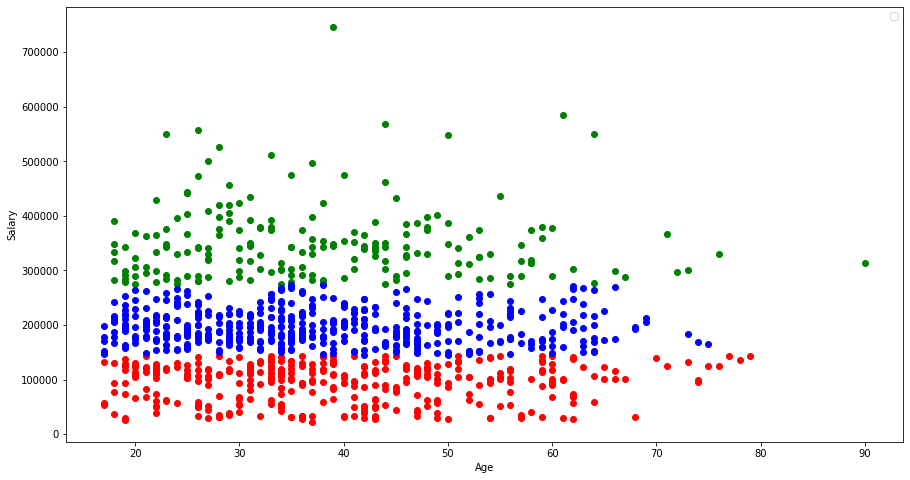

In [9]:
plt.figure(figsize = (15,8))
df1 = data[data.cluster == 0]
df2 = data[data.cluster == 1]
df3 = data[data.cluster == 2]

plt.scatter(df1.Age, df1.Salary, color = 'Red')
plt.scatter(df2.Age, df2.Salary, color = 'Green')
plt.scatter(df3.Age, df3.Salary, color = 'Blue')

plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()


# With MinMaxScaler

In [10]:
x = data['Salary'].values.reshape(-1, 1) #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data['Salary'] = x_scaled

y = data['Age'].values.reshape(-1, 1) #returns a numpy array
y_scaled = min_max_scaler.fit_transform(y)
data['Age'] = y_scaled
data

,Age,WorkClass,Salary,cluster
0,0.616438,Self-emp-not-inc,0.006500,0
1,0.013699,Private,0.256563,2
2,0.109589,Private,0.110788,0
3,0.219178,Private,0.675305,1
4,0.260274,Private,0.373136,1
...,...,...,...,...
995,0.630137,?,0.204708,2
996,0.082192,Private,0.264314,2
997,0.109589,Private,0.231727,2
998,0.123288,Private,0.103441,0


In [11]:
km = KMeans(n_clusters=3)
y_pred2 = km.fit_predict(data[['Age', 'Salary']])
y_pred2

array([1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 0,
       2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2,
       1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 1, 1, 1, 2, 2,
       1, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 0, 2,
       1, 2, 1, 2, 0, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 0, 1, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0, 0,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 0, 2, 1,
       1, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1,
       0, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 0, 2, 2, 1, 2, 1,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       1, 2, 0, 1, 2, 2, 0, 2, 1, 0, 2, 0, 2, 1, 0,

In [12]:
data['cluster'] = y_pred2
data

,Age,WorkClass,Salary,cluster
0,0.616438,Self-emp-not-inc,0.006500,1
1,0.013699,Private,0.256563,2
2,0.109589,Private,0.110788,2
3,0.219178,Private,0.675305,0
4,0.260274,Private,0.373136,0
...,...,...,...,...
995,0.630137,?,0.204708,1
996,0.082192,Private,0.264314,2
997,0.109589,Private,0.231727,2
998,0.123288,Private,0.103441,2


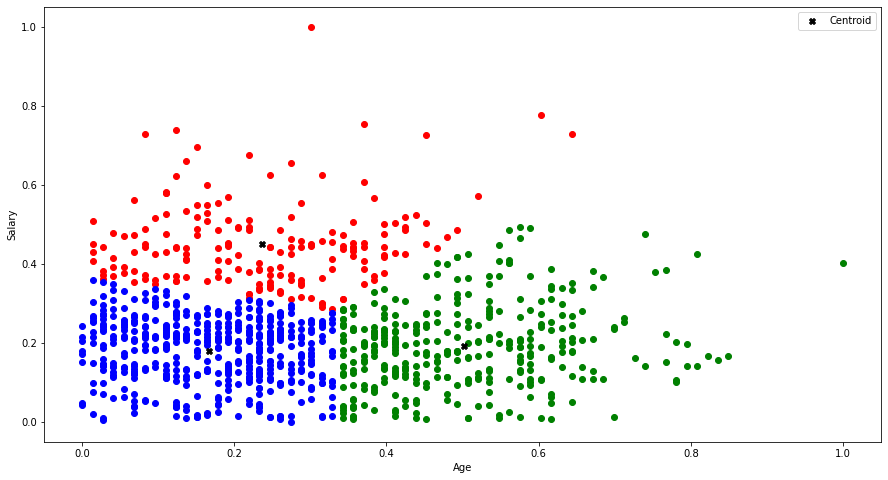

In [13]:
plt.figure(figsize = (15,8))
df1 = data[data.cluster == 0]
df2 = data[data.cluster == 1]
df3 = data[data.cluster == 2]

plt.scatter(df1.Age, df1.Salary, color = 'red')
plt.scatter(df2.Age, df2.Salary, color = 'Green')
plt.scatter(df3.Age, df3.Salary, color = 'Blue')
plt.scatter(km.cluster_centers_[: , 0],km.cluster_centers_[:,1],color = 'Black',marker = 'X', label = 'Centroid')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()


# Finding best K

In [14]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age', 'Salary']])
    sse.append(km.inertia_)


# Plotting SSE to find Elbow

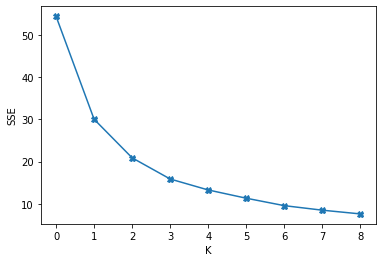

In [17]:
plt.plot(sse, marker = 'X')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()